In [7]:
import pandas as pd
import numpy as np
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import tasks
from tesser import rsa 
from scipy.stats import linregress
from scipy.stats import pearsonr
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data_dir = "/home/rodrigo/Dropbox/tesser_successor/Data/"
subject = 100
gamma, alpha = 0.5, 0.5
struc_data = util.load_struct_df_all(data_dir,subject)

In [13]:
struc_data

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
0,100,1,1,10,object_2.jpg,cor,1.0,c,1.0,1.0,1.426618,1,NaN
1,100,1,2,5,object_30.jpg,cor,1.0,c,1.0,1.0,0.759233,1,NaN
2,100,1,3,4,object_12.jpg,cor,1.0,c,1.0,1.0,0.866177,1,NaN
3,100,1,4,3,object_7.jpg,cor,1.0,c,1.0,1.0,0.712731,1,NaN
4,100,1,5,1,object_6.jpg,cor,1.0,c,1.0,1.0,0.654236,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,100,6,145,10,object_2.jpg,cor,1.0,c,1.0,1.0,0.567551,2,1.0
145,100,6,146,5,object_30.jpg,cor,1.0,c,1.0,1.0,0.599922,2,1.0
146,100,6,147,8,object_24.jpg,cor,1.0,c,1.0,1.0,0.553967,2,1.0
147,100,6,148,10,object_2.jpg,cor,1.0,c,1.0,1.0,0.581383,2,1.0


In [14]:
#help(sr)

In [15]:
SR_standard = sr.learn_sr(struc_data,gamma,alpha)
SR_reset = sr.explore_runs(struc_data,"reset",gamma,alpha)
SR_independent = sr.explore_runs(struc_data,"independent",gamma,alpha)

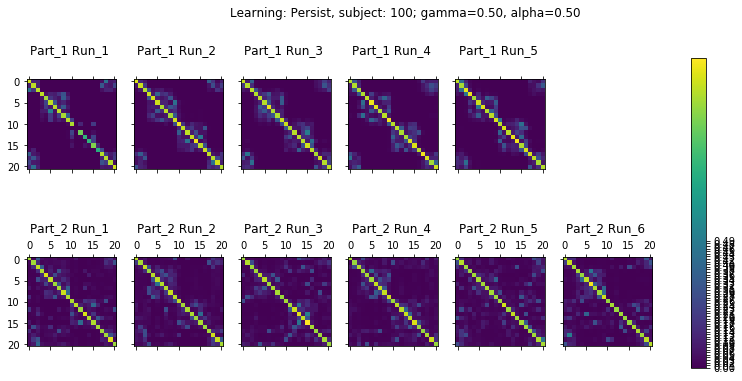

In [16]:
sr.plot_sr(SR_standard,subject,"Persist",gamma,alpha)

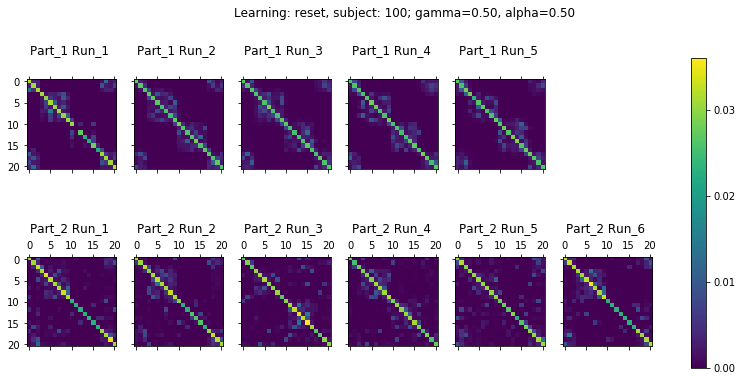

In [17]:
sr.plot_sr(SR_reset,subject,"reset",gamma,alpha)

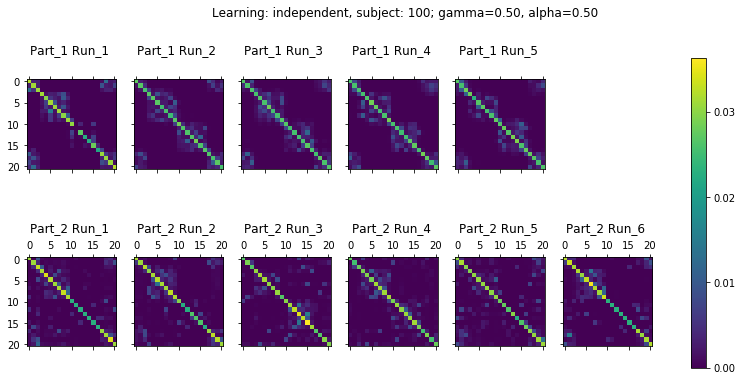

In [18]:
sr.plot_sr(SR_independent,subject,"independent",gamma,alpha)

In [19]:
subject_nums = util.subj_list()

for subject_num in subject_nums:
    try:
        struc_df = util.load_struct_df_all ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
        induc_df = util.load_induct_df_all ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
        group_df = util.load_group ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)

        print ('Subject:', subject_num)

        print ('')

        print ('Induction Task:')

        alpha_max, gamma_max, tau_max = fit.maximize_induction_likelihood (struc_df, induc_df, 'differential evolution')
        print ('Alpha Max:', alpha_max)
        print ('Gamma Max:', gamma_max)
        print ('Tau Max:', tau_max)

        print ('')

        alpha_max, gamma_max = fit.minimize_grouping_error (struc_df, group_df, 'differential evolution')
        print('Grouping Task:')
        print('Alpha Max:', alpha_max)
        print ('Gamma Max:', gamma_max)

        print ('')
    except:
        pass

In [23]:
a_in = []
g_in = []
t_in = []
a_g = []
b_g = []
for subject_num in subject_nums:
    try:
        struc_df = util.load_struct_df_all ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
        induc_df = util.load_induct_df_all ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
        group_df = util.load_group ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
        
        a, g, t = fit.maximize_induction_likelihood (struc_df, induc_df, 'differential evolution')
        a_in.append(a)
        g_in.append(g)
        t_in.append(t)
        alpha_max, gamma_max = fit.minimize_grouping_error (struc_df, group_df, 'differential evolution')
        a_g.append(alpha_max)
        b_g.append(gamma_max)
    except:
        pass

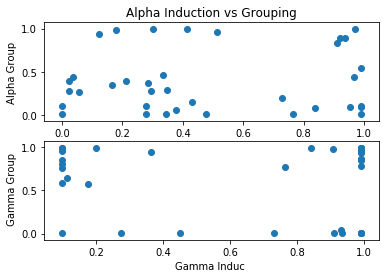

In [35]:
plt.subplot(2, 1, 1)
plt.scatter(a_in, a_g)

plt.title('Alpha Induction vs Grouping')
plt.xlabel('Alpha Induc')
plt.ylabel('Alpha Group')

plt.subplot(2, 1, 2)
plt.scatter(g_in, b_g)
plt.xlabel('Gamma Induc ')
plt.ylabel(' Gamma Group')

plt.show()

In [4]:
subject_num = 101
struc_df = util.load_struct_df_all ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
induc_df = util.load_induct_df_all ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
group_df = util.load_group ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)

print ('Subject:', subject_num)

print ('')

print ('Induction Task:')

alpha_max, gamma_max, tau_max = fit.maximize_induction_likelihood_fixed(struc_df, induc_df, 'not fixed')
print ('Alpha Max:', alpha_max)
print ('Gamma Max:', gamma_max)
print ('Tau Max:', tau_max)

print ('')

alpha_max, gamma_max = fit.minimize_grouping_error_fixed(struc_df, group_df, 'not fixed')
print('Grouping Task:')
print('Alpha Max:', alpha_max)
print ('Gamma Max:', gamma_max)

print ('')


Subject: 101

Induction Task:
Alpha Max: 0.67345313592569
Gamma Max: 0.99
Tau Max: 0.99

Grouping Task:
Alpha Max: 0.15329159061120173
Gamma Max: 0.8520243736772682



In [5]:

print ('Induction Task fixed alpha:')

alpha_max, gamma_max, tau_max = fit.maximize_induction_likelihood_fixed(struc_df, induc_df, 'fixed alpha', 0.2)
print ('Alpha:', alpha_max)
print ('Gamma Max:', gamma_max)
print ('Tau Max:', tau_max)

print ('')

alpha_max, gamma_max = fit.minimize_grouping_error_fixed(struc_df, group_df,  'fixed alpha', 0.2)
print('Grouping Task fixed alpha:')
print('Alpha:', alpha_max)
print ('Gamma Max:', gamma_max)

print ('')

Induction Task fixed alpha:
Alpha: 0.7927066987065262
Gamma Max: 0.99
Tau Max: 0.99

Grouping Task fixed alpha:
Alpha: 0.46587988308954864
Gamma Max: 0.8849064595685012



In [6]:



print ('Induction Task fixed gamma:')

alpha_max, gamma_max, tau_max = fit.maximize_induction_likelihood_fixed(struc_df, induc_df, 'fixed gamma', 0.2)
print ('Alpha Max:', alpha_max)
print ('Gamma :', gamma_max)
print ('Tau Max:', tau_max)

print ('')

alpha_max, gamma_max = fit.minimize_grouping_error_fixed(struc_df, group_df,  'fixed gamma', 0.2)
print('Grouping Task fixed gamma:')
print('Alpha Max:', alpha_max)
print ('Gamma:', gamma_max)

print ('')

Induction Task fixed gamma:
Alpha Max: 0.99
Gamma : 0.8589681918077303
Tau Max: 0.06358158137811

Grouping Task fixed gamma:
Alpha Max: 0.050645489371382225
Gamma: 0.28625073654412714



In [10]:
alpha_induc_fixed = []
gamma_induc_alpha_fixed = []
alpha_induc_gamma_fixed = []
gamma__induc_fixed= []

alpha_group_fixed= []
gamma_group_alpha_fixed = []
alpha_group_gamma_fixed = []
gamma__group_fixed= []
subject_nums = util.subj_list()
for subject_num in subject_nums:
    try:
        struc_df = util.load_struct_df_all ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
        induc_df = util.load_induct_df_all ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
        group_df = util.load_group ('/home/rodrigo/Dropbox/tesser_successor/Data/', subject_num)
        alpha_fixed, gamma_max, tau_max = fit.maximize_induction_likelihood_fixed(struc_df, induc_df, 'fixed alpha', 0.2)
        alpha_max, gamma_max, tau_max = fit.maximize_induction_likelihood_fixed(struc_df, induc_df, 'fixed gamma', 0.5)
        alpha_induc_fixed.append(0.2)
        gamma_induc_alpha_fixed.append(gamma_max)
        alpha_induc_gamma_fixed.append(alpha_max)
        gamma__induc_fixed.append(0.5)

        alpha_fixed, gamma_max = fit.minimize_grouping_error_fixed(struc_df, group_df, 'fixed alpha',0.2)
        alpha_max, gamma_fixed = fit.minimize_grouping_error_fixed(struc_df, group_df, 'fixed gamma',0.5)
        alpha_group_fixed.append(0.2)
        gamma_group_alpha_fixed.append(gamma_max)
        alpha_group_gamma_fixed.append(alpha_max)
        gamma__group_fixed.append(0.5)
    except:
        pass

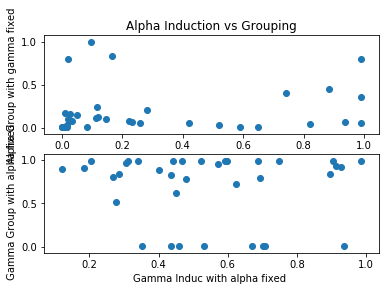

In [16]:
plt.subplot(2, 1, 1)
plt.scatter(alpha_induc_gamma_fixed,alpha_group_gamma_fixed)

plt.title('Alpha Induction vs Grouping')
plt.xlabel('Alpha Induc with gamma fixed')
plt.ylabel('Alpha Group with gamma fixed')

plt.subplot(2, 1, 2)
plt.scatter(gamma_induc_alpha_fixed,gamma_group_alpha_fixed)
plt.xlabel('Gamma Induc with alpha fixed ')
plt.ylabel(' Gamma Group with alpha fixed')

plt.show()


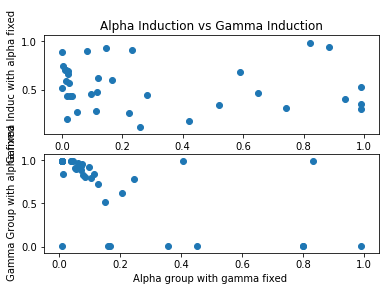

In [18]:
plt.subplot(2, 1, 1)
plt.scatter(alpha_induc_gamma_fixed,gamma_induc_alpha_fixed)

plt.title('Alpha Induction vs Gamma Induction')
plt.xlabel('Alpha Induc with gamma fixed')
plt.ylabel('Gamma Induc with alpha fixed ')

plt.subplot(2, 1, 2)
plt.scatter(alpha_group_gamma_fixed,gamma_group_alpha_fixed)
plt.xlabel('Alpha group with gamma fixed ')
plt.ylabel(' Gamma Group with alpha fixed')

plt.show()
